# Heart Disease Prediction based on Medical Attributes


**Approach Used**
1. Problem Definition
2. Data Acquization and Preparation
3. Evaluation (defining Success)
4. Features Engineering
5. Modelling (Model Building)
6. Experimentation

## 1. Problem Definition 

Given clinical attributes for a patient, can we predict whether they have heart disease or not?


## 2. Data

The Data is provided by Cleveland and is available on UCI Machine Learning Repository as well as on kaggle.

## 3. Evaluation

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

**Data Dictionary**

* age - age in years
* sex - (1-Male, 0-Female)
* cp - Chest Pain type
* trestbps - resting blood pressure (in mg Hg on admission to Hospital )
* chol - Serum cholestrol in mg/dl
* fbs - (Fasting blood sugar > 120 mg/dl) (1 = true, 0 = false)
* restecg - resting electrocardiographic results 
* thalach - Maximum heart rate achieved
* exang - exercise induced angina (1 = yes, 0 = no)
* oldpeak - depression induced by exercise relative to rest
* slope - the slope of the peak exercise ST segment
* ca - number of major vessels (0-3) colored by flourosopy
* thal -   3 = normal; 6 = fixed defect; 7 = reversable defect
* target 1 or 0

## 5. Modelling


## 6. Experimentation

In [1]:
# EDA modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline 

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# evaluation modules
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, auc, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve

###### Data Loading

In [2]:
df = pd.read_csv('Data/heart-disease.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
# Data Exploration

df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

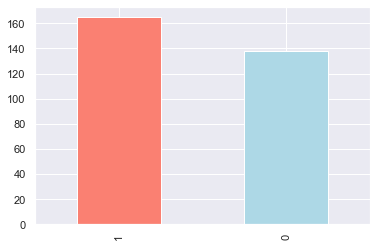

In [5]:
df['target'].value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue']);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequnecy According to Sex

In [9]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# comparing sex column with target column
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


As seen above there out of **96** ```Females```, **72** have heart disease.

This means that any given Female based on this data have approximately **75%** chance of having heart disease on the grounds of their sex.

For men, the data is a bit even since out of **207** men, there **114** who have heart disease.

This means we cannot build a machine learning model based on the sex variable alone.
We need a model that will beat this Sex Variable bias.

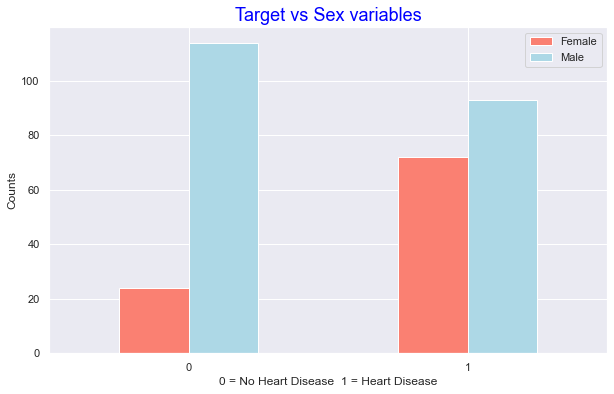

In [11]:
# plotting the Sex versus target
pd.crosstab(df['target'], df['sex']).plot(kind='bar', color=['salmon', 'lightblue'], figsize=(10,6))
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)
plt.xlabel('0 = No Heart Disease  1 = Heart Disease')
plt.ylabel("Counts")
plt.title("Target vs Sex variables", fontdict={'fontsize':18, 'color':'blue'});

In [12]:
 df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [14]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [15]:
df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [16]:
df['thalach'].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

In [17]:
df.age

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64

In [18]:
df['age'][df['target']==1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

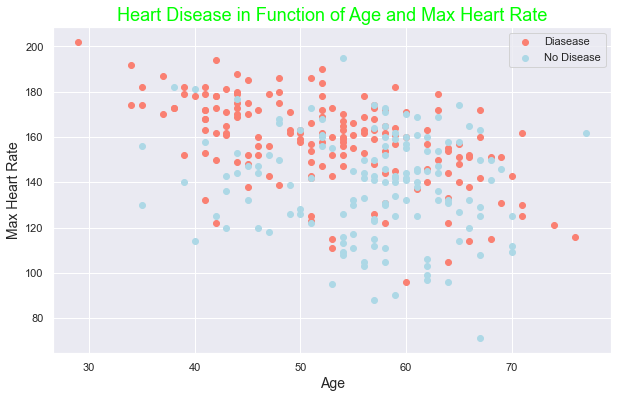

In [19]:
# scatter plots with positive examples
plt.figure(figsize=(10, 6))
plt.scatter(df['age'] [df['target'] == 1], df['thalach'][df['target'] == 1], color=['salmon'])

# scatter plots for negative examples
plt.scatter(df['age'] [df['target'] == 0], df['thalach'][df['target'] == 0], color=['lightblue'])

plt.title("Heart Disease in Function of Age and Max Heart Rate", fontdict = {'size':18, 'color':'lime'})
plt.xlabel("Age", fontdict = {'size':14})
plt.ylabel("Max Heart Rate", fontdict = {'size':14})
plt.legend(["Diasease", "No Disease"]);

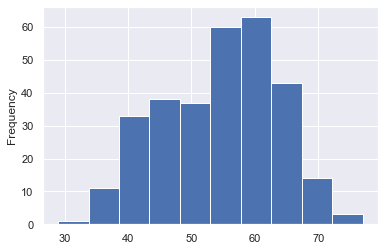

In [20]:
# check Distributions of Age

df['age'].plot(kind='hist');

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


##### Chest Pain

``cp`` chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
        
* 1: Atypical angina: Chest pain not related to heart

* 2: Non-anginal pain: typically esophageal spasms(non heart related)

* 3: Asymptomatic:  Chest pain not showing signs of disease


In [22]:
 pd.crosstab(df['cp'], df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


Above types of chest pains do not reflect the expectations e.g heart related chest pain is not resulting to a heart disease yet we expected it to result into a disease.

such a case require the attention of the Subject Matter Expert (Cardiologist in this case)

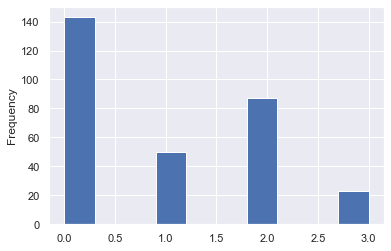

In [23]:
df['cp'].plot(kind='hist');

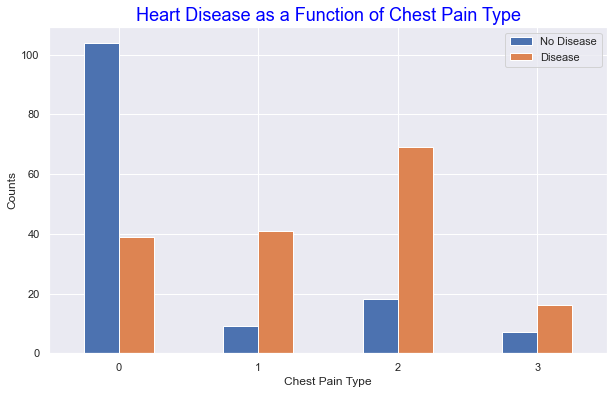

In [24]:
pd.crosstab(df['cp'], df['target']).plot(kind='bar', figsize=(10,6))
plt.title("Heart Disease as a Function of Chest Pain Type", fontdict={'size':18, 'color':'blue'})
plt.ylabel("Counts")
plt.xlabel("Chest Pain Type")
plt.legend(['No Disease','Disease'])
plt.xticks(rotation=0);

In [25]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [26]:
corr_matrix = df.corr()

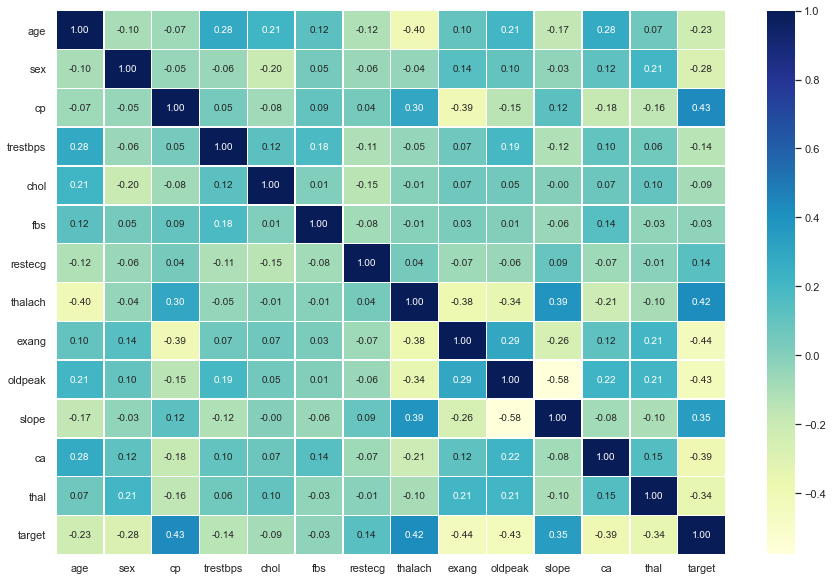

In [27]:
fig, ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix, annot=True, fmt='0.2f', cmap='YlGnBu', linewidths=0.5)

# for earlier version of matplotlib the figures' top and bottom are not properly fit to correct this we do:
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top+0.5)

## 5. Modelling

In [28]:
X = df.drop('target',axis=1)
y = df['target']

In [29]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:

models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    fits and evaluates the model
    """
    np.random.seed(42)
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [31]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [32]:
model_compare = pd.DataFrame(model_scores, index=['acccuracy'])
model_compare

,Logistic Regression,KNN,Random Forest
acccuracy,0.885246,0.688525,0.836066


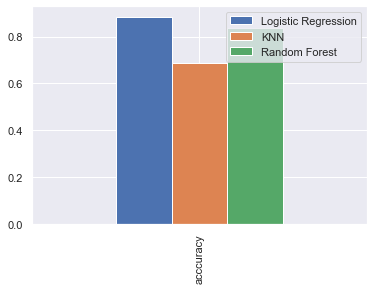

In [33]:
model_compare.plot(kind='bar');

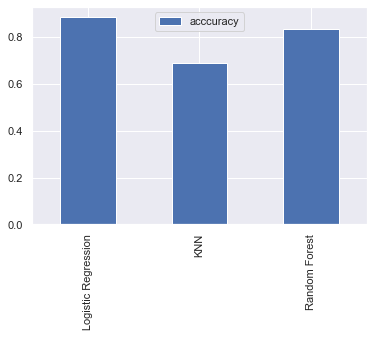

In [34]:
model_compare.T.plot(kind='bar');

### Hyperparameters Tuning

In [35]:
#KNN Classifier

train_scores = []
test_scores = []
neigbors = range(1, 21)
model = KNeighborsClassifier()
for i in neigbors:
    model.set_params(n_neighbors=i)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

In [36]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [37]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

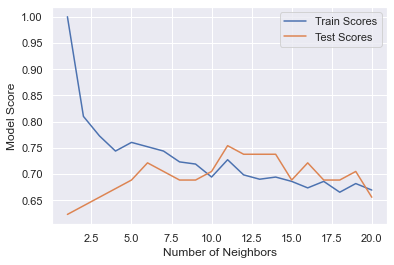

In [38]:
plt.plot(neigbors, train_scores, label='Train Scores')
plt.plot(neigbors, test_scores, label='Test Scores')
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score");

In [39]:
print(f"The Maximum KNN Score on the test data: {max(test_scores)*100:.2f}%")

The Maximum KNN Score on the test data: 75.41%


KNN is still far away from the other two models and thus we discard it

## Hyperparameter Tuning with RandomizedSearchCV

In [40]:
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ['liblinear'],
}

rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10 ],
    "min_samples_split": np.arange(2,20,2),
    "min_samples_leaf": np.arange(1,20,2)
}

In [41]:
# Logistic Regression Model
np.random.seed(42)
rs_lg_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)

rs_lg_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [42]:
rs_lg_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [43]:
rs_lg_reg.score(X_test, y_test)

0.8852459016393442

In [44]:
model_compare

,Logistic Regression,KNN,Random Forest
acccuracy,0.885246,0.688525,0.836066


In [ ]:
# Random Forest
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
rs_rf.best_params_

In [ ]:
rs_rf.score(X_test, y_test)

In [ ]:
model_compare

## Hyperparameters Tuning GridSearchCV

LogisticRegression seems promising thus will tune this using GridSearchCV

In [ ]:
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear",]}

#grid search model
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)

# fitting

gs_log_reg.fit(X_train, y_train)

In [ ]:
gs_log_reg.best_estimator_

In [ ]:
gs_log_reg.best_params_

In [ ]:
gs_log_reg.best_score_

In [ ]:
gs_log_reg.score(X_test, y_test)

### Further Evaluation

* ROC curve and AUC Curve
* confusion matrix
* classification report
* Precision
* Recall
* F1 score

In [ ]:
y_preds = gs_log_reg.predict(X_test)

In [ ]:
y_preds

In [ ]:
y_test

In [ ]:
# ROC Curve
plot_roc_curve(gs_log_reg, X_test, y_test );

In [ ]:
# confusion matrix

confusion_matrix(y_test, y_preds)

In [ ]:
# making it more appealing

sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    '''
    Plots a pretttier confusion 
    '''
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel("True Labels")
    plt.ylabel("Predicted Labels")

plot_conf_mat(y_test, y_preds)

In [ ]:
print(classification_report(y_test, y_preds))

## Feature Importance

Which feature contributes most to the outcome? 

In [ ]:
df.head()

In [ ]:
gs_log_reg.best_params_

In [ ]:
log_reg = LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [ ]:
log_reg.fit(X_train, y_train)

In [ ]:
log_reg.coef_

In [ ]:
df.columns

In [ ]:

feature_importance = pd.DataFrame(log_reg.coef_, columns=X_train.columns)

feature_importance

In [ ]:
feature_importance.T

In [ ]:
feature_importance.T.plot.bar(title="Feature Importance", legend=False);

In [ ]:
pd.crosstab(df['sex'], df['target'])

In [ ]:
pd.crosstab(['slope'], df['target'])